# Importando as bibliotecas 

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor


In [21]:
# Carrega os dados
df = pd.read_csv('diabetes.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Pré-Processamento dos dados

In [22]:
######################################## REGRESSÃO LINEAR ##################################################

# Converte "sim" para 1 e "não" para 0 na coluna "smoker" (fumante - não fumante)
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Verifica elementos faltantes
print(f"Elementos faltantes:\n{df.isna().sum()}")

# Separação dos dados em treino e teste para regressão linear
XTrainLinear, XTestLinear, yTrainLinear, yTestLinear = train_test_split(df[["bmi"]], df["charges"], test_size=0.3)


# Normalização usando Min-Max Scaling
# Calcula média e desvio padrão, em seguida, aplica a transformação normalizando os dados. 
scaler = MinMaxScaler()
XTrain_scaled = scaler.fit_transform(XTrainLinear)
XTest_scaled = scaler.transform(XTestLinear)


######################################## REGRESSÃO POLINOMIAL #########################################

# Separação dos dados em treino e teste
XTrainMultipla, XTestMultipla, yTrainMultipla, yTestMultipla = train_test_split(df[["bmi", "age", "smoker"]], df["charges"], test_size=0.3)


# Cria as características polinomiais
poly = PolynomialFeatures(degree=2) #polinomial de grau 2
XTrainMultipla_poly = poly.fit_transform(XTrainMultipla)
XTestMultipla_poly = poly.transform(XTestMultipla)

scaler = StandardScaler()
XTrainMultipla_poly[:, 1:] = scaler.fit_transform(XTrainMultipla_poly[:, 1:]) # exclui a primeira coluna que geralmente contém o termo constante e, em seguida, transforma esses dados aplicando a padronização. 
XTestMultipla_poly[:, 1:] = scaler.transform(XTestMultipla_poly[:, 1:])


############################################ ARVORE DE DECISÃO ##################################################

#A normalização não é necessária para árvores de decisão, pois elas não são sensíveis à escala das variáveis.
#A árvore de decisão faz divisões em nós com base em condições nos dados 

# Separação dos dados em treino e teste
XTrain_arvore, XTest_arvore, yTrain_arvore, yTest_arvore = train_test_split(df[["bmi", "age", "smoker"]], df["charges"], test_size=0.3)



Elementos faltantes:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Treino

In [23]:
############################ REGRESSÃO LINEAR ###########################################

regressor = LinearRegression()
XTrainLinear = pd.DataFrame(XTrainLinear) #O conteúdo de XTrain está em formato unidimensional(série), o método fit do regressor exige que XTrain tenha estrutura bidimensional(dataframe).
regressor.fit(XTrainLinear, yTrainLinear)

XTestLinear = pd.DataFrame(XTestLinear)
yPred = regressor.predict(XTestLinear) 

dfResultado = pd.concat([XTestLinear, yTestLinear], axis=1) #concatenação deve ser feita ao longo das colunas, axis=1
dfResultado["Predição"] = yPred
print(dfResultado)

# Calcula o erro médio quadrático (MSE) entre os valores reais de "charges" e as previsões armazenadas em "Predição"
# Quanto menor o valor do MSE, melhor é o desempenho do modelo, indicando que as previsões estão mais próximas dos valores reais.
mse = mean_squared_error(dfResultado["charges"], dfResultado["Predição"])
rmse = np.sqrt(mse)
print(f"RMSE: Regressão Linear {rmse}")


##################### REGRESSÃO POLINOMIAL #######################################################

# Transforma as features para incluir termos polinomiais de grau 2
#poly = PolynomialFeatures(degree=2)
#XTrainMultipla_poly = poly.fit_transform(XTrainMultipla)
#XTestMultipla_poly = poly.transform(XTestMultipla)


# Regressão polinomial
# Durante o treinamento, o modelo ajusta os coeficientes para minimizar 
# a diferença entre as previsões do modelo e os rótulos reais.
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(XTrainMultipla_poly, yTrainMultipla) #conjunto de treinamento que foi transformado por características polinomiais

# gerar previsões para o conjunto de teste transformado por características polinomiais 
yPredMultipla_poly = regressorPolinomial.predict(XTestMultipla_poly)

# Calcula o RMSE para a regressão polinomial múltipla
rmseMultipla_poly = np.sqrt(mean_squared_error(yTestMultipla, yPredMultipla_poly))

print(f"RMSE (Regressão Polinomial ): {rmseMultipla_poly}")


############################# ARVORE DE DECISAO ######################################################

# Ajustando o modelo de árvore de decisão aos dados de treinamento. 
# Durante o treinamento, a árvore de decisão é construída de forma a minimizar 
# a diferença entre as previsões do modelo e os rótulos reais.
regressor_tree = DecisionTreeRegressor()
regressor_tree.fit(XTrain_arvore, yTrain_arvore)

# Contem as previsões do modelo de árvore de decisão para o conjunto de teste. 
yPred_tree = regressor_tree.predict(XTest_arvore)

# Calcula o RMSE para a árvore de decisão
rmse_tree = np.sqrt(mean_squared_error(yTest_arvore, yPred_tree))

print(f"RMSE (Regressão com Árvore de Decisão): {rmse_tree}")

         bmi      charges      Predição
726   28.405   6664.68595  12486.723320
774   34.200   7261.74100  14687.712700
1050  36.955   8023.13545  15734.084700
762   27.100  19040.87600  11991.073425
703   26.410   5385.33790  11729.005664
...      ...          ...           ...
6     33.440   8240.58960  14399.058355
231   27.830  14001.28670  12268.333519
1011  20.130  18767.73770   9343.809235
1066  37.290   8978.18510  15861.320497
89    26.980  11082.57720  11945.496423

[402 rows x 3 columns]
RMSE: Regressão Linear 11325.585486847523
RMSE (Regressão Polinomial ): 5311.865934460268
RMSE (Regressão com Árvore de Decisão): 6526.3513495975285


# Visualização da Regressão Linear

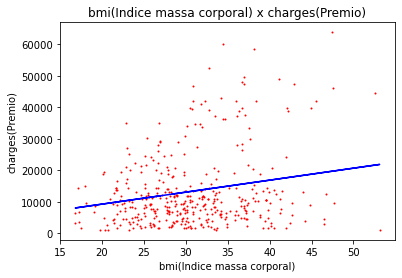

In [24]:
plt.scatter(dfResultado["bmi"][::1], dfResultado["charges"][::1], color = 'red', s=1) #[inicio:fim:step] 1% das amostras
plt.plot(dfResultado["bmi"], dfResultado["Predição"], color='blue')
plt.title("bmi(Indice massa corporal) x charges(Premio)")
plt.xlabel("bmi(Indice massa corporal)")
plt.ylabel("charges(Premio)")
plt.show()



# Visualização da Regressão Polinomial

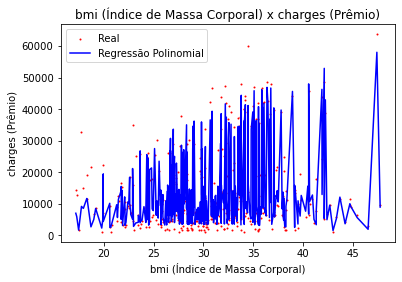

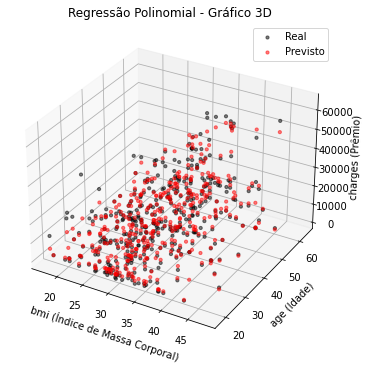

In [25]:

# Ordena os índices com base nos valores de bmi
sorted_indices = np.argsort(XTestMultipla["bmi"])

# Aplica a ordenação aos dados
X_bmi_sorted = XTestMultipla["bmi"].values[sorted_indices]
y_real_sorted = yTestMultipla.values[sorted_indices]
y_pred_sorted = yPredMultipla_poly[sorted_indices]

# Visualização (considerando apenas uma variável independente para o gráfico)
plt.scatter(X_bmi_sorted, y_real_sorted, color='red', s=1, label='Real')
plt.plot(X_bmi_sorted, y_pred_sorted, color='blue', label='Regressão Polinomial')
plt.title("bmi (Índice de Massa Corporal) x charges (Prêmio)")
plt.xlabel("bmi (Índice de Massa Corporal)")
plt.ylabel("charges (Prêmio)")
plt.legend()
plt.show()

# Visualização 3D 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#pontos pretos representam os valores reais e os pontos vermelhos representam os valores previstos pelo modelo.
# o método alpha=0.5 torna os pontos semi-transparentes sendo útil quando há sobreposição de pontos.
ax.scatter(XTestMultipla["bmi"].values[sorted_indices], XTestMultipla["age"].values[sorted_indices], y_real_sorted, color='black', label='Real', s=10, alpha=0.5)
ax.scatter(XTestMultipla["bmi"].values[sorted_indices], XTestMultipla["age"].values[sorted_indices], y_pred_sorted, color='red', label='Previsto', s=10, alpha=0.5)

# Configurações do gráfico
ax.set_xlabel("bmi (Índice de Massa Corporal)")
ax.set_ylabel("age (Idade)")
ax.set_zlabel("charges (Prêmio)")
ax.set_title("Regressão Polinomial - Gráfico 3D")

# Adiciona uma grade
ax.grid(True, linestyle='--', alpha=0.5)

# Adiciona uma legenda
ax.legend()

plt.show()

# Visualização da Arvore da Decisão

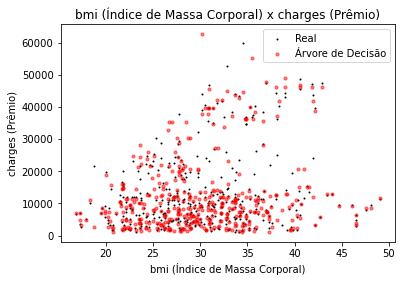

In [26]:
# Visualização (considerando apenas uma variável independente para o gráfico)
plt.scatter(XTest_arvore["bmi"], yTest_arvore, color='black', s=1, label='Real')
plt.scatter(XTest_arvore["bmi"], yPred_tree, color='red', s=10, alpha=0.5, label='Árvore de Decisão')
plt.title("bmi (Índice de Massa Corporal) x charges (Prêmio)")
plt.xlabel("bmi (Índice de Massa Corporal)")
plt.ylabel("charges (Prêmio)")
plt.legend()
plt.show()



# Observações:

Regressão Linear:

Assume uma relação linear entre as características e a variável de destino. Isso significa que o modelo procura encontrar os pesos que melhor se ajustam a uma combinação linear das características.
Limitações: Se a relação entre as características e a variável de destino for não linear, a Regressão Linear pode não capturar essas relações de forma eficaz.


Regressão com Árvore de Decisão:

As árvores de decisão são modelos não lineares que dividem o espaço de características em regiões e atribuem uma previsão a cada região.
Vantagens: Árvores de decisão podem capturar relações não lineares e são menos sensíveis à escala das características.
Limitações: Podem ser propensas a overfitting e podem não generalizar bem para dados não vistos, especialmente sem ajuste de hiperparâmetros adequado.


Regressão Polinomial:

Introduz termos polinomiais nas características originais, permitindo que o modelo represente relações polinomiais.
Vantagens: Pode modelar relações mais complexas, incluindo curvaturas e interações entre características.
Limitações: Pode ser propensa a overfitting se o grau do polinômio for muito alto, e a interpretação do modelo pode se tornar mais complexa.